# Statistical Modeling and Model Validation

---

### Hi! This is still very much a work in progress ###

Here I am practicing linear regression, KNN, and logistic regression using two different datasets.

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

# Part 1: Regression on MPG Data

## Read the Data
The [`mpg` data set](https://archive.ics.uci.edu/ml/datasets/auto+mpg) represents the fuel economy (in miles per gallon) for 38 popular models of car, measured between 1999 and 2008.

|Factor      |Type                              |Description                                               |
|------------|----------------------------------|----------------------------------------------------------|
|manufacturer|multi-valued discrete             |Vehicle manufacturer                                      |
|model       |multi-valued discrete             |Model of the vehicle                                      |
|displ       |continuous                        |Size of engine [litres]                                   |
|year        |multi-valued discrete             |Year of vehicle manufacture                               |
|cyl         |multi-valued discrete             |Number of ignition cylinders                              |
|trans       |multi-valued discrete             |Transmission type (manual or automatic)                   |
|drv         |multi-valued discrete             |Driven wheels (f=front, 4=4-wheel, r=rear wheel drive)    |
|city        |continuous                        |Miles per gallon, city driving conditions (fuel economy)  |
|fl          |multi-valued discrete             |Vehicle type                                              |
|class       |multi-valued discrete             |Vehicle class (suv, compact, etc)                         |

In [49]:
mpg = pd.read_csv('data/mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


## EDA

In [50]:
mpg.shape

(234, 11)

In [51]:
mpg.isnull().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
dtype: int64

In [52]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [72]:
mpg.dtypes

manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object

In [53]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [54]:
mpg['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [55]:
mpg['manufacturer'].unique()

array(['audi', 'chevrolet', 'dodge', 'ford', 'honda', 'hyundai', 'jeep',
       'land rover', 'lincoln', 'mercury', 'nissan', 'pontiac', 'subaru',
       'toyota', 'volkswagen'], dtype=object)

In [56]:
mpg['year'].unique()

array([1999, 2008])

In [57]:
#only numeric variables
mpgnum = mpg[['displ','year','cyl','cty','hwy']]

mpgnum.corr()

,displ,year,cyl,cty,hwy
displ,1.000000,0.147843,0.930227,-0.798524,-0.766020
year,0.147843,1.000000,0.122245,-0.037232,0.002158
cyl,0.930227,0.122245,1.000000,-0.805771,-0.761912
cty,-0.798524,-0.037232,-0.805771,1.000000,0.955916
hwy,-0.766020,0.002158,-0.761912,0.955916,1.000000


<Axes: >

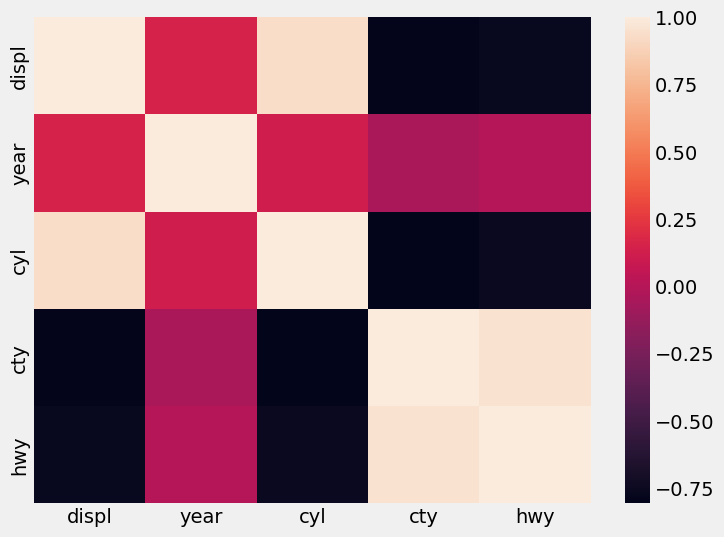

In [58]:
sns.heatmap(mpgnum.corr())

In [59]:
#everything but year looks strongly correlated

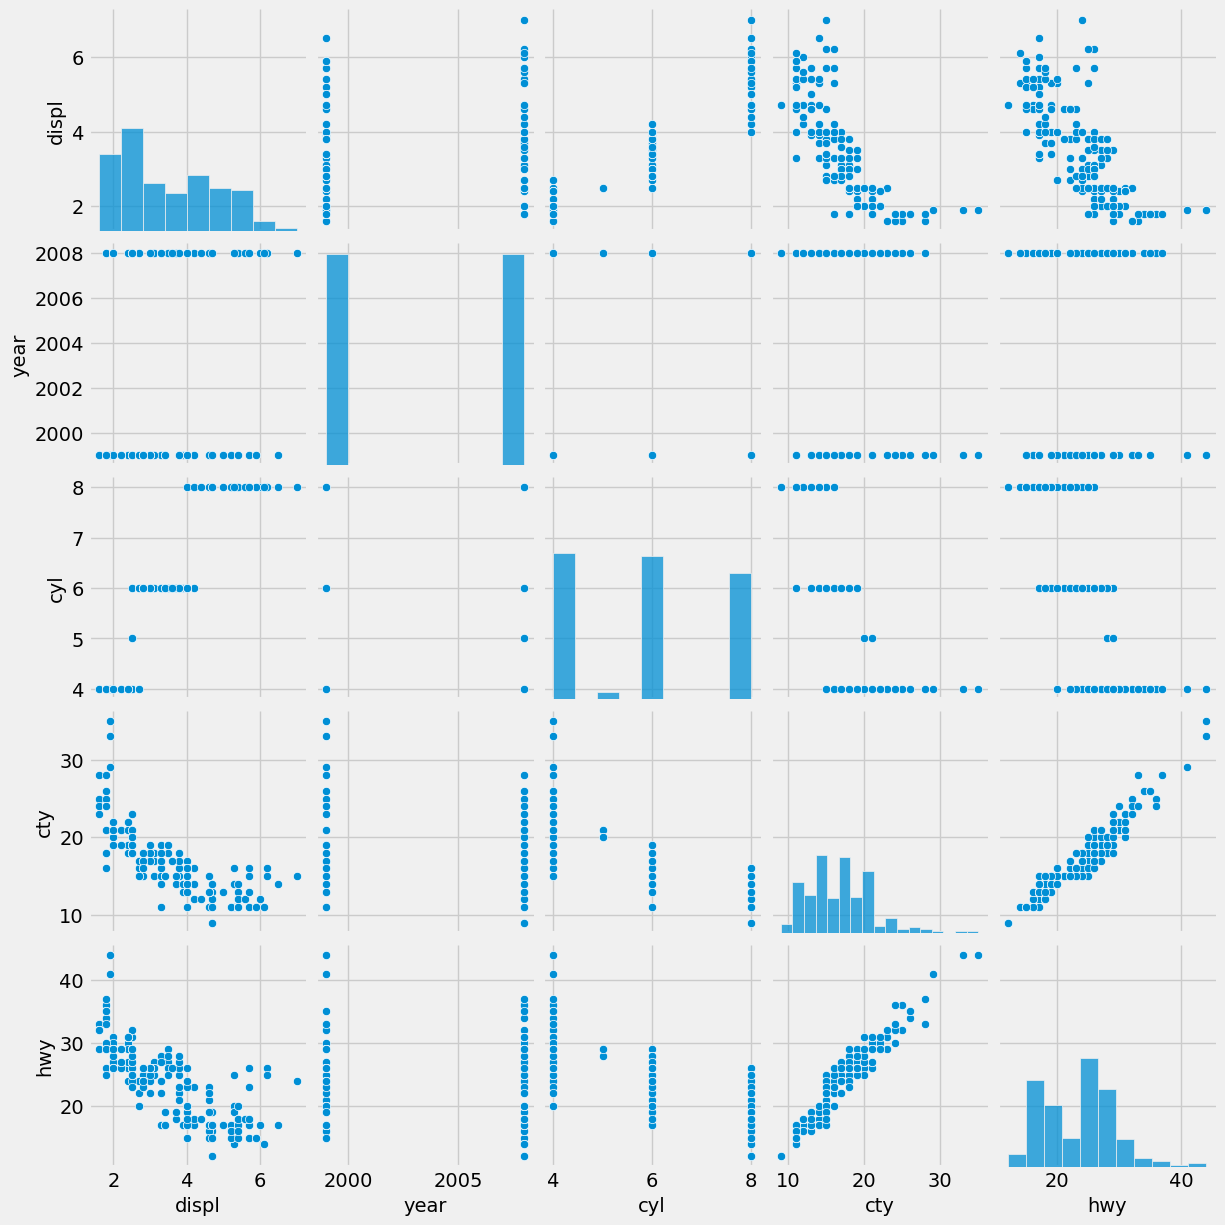

In [64]:
sns.pairplot(mpgnum, x_vars=mpgnum, y_vars=mpgnum)

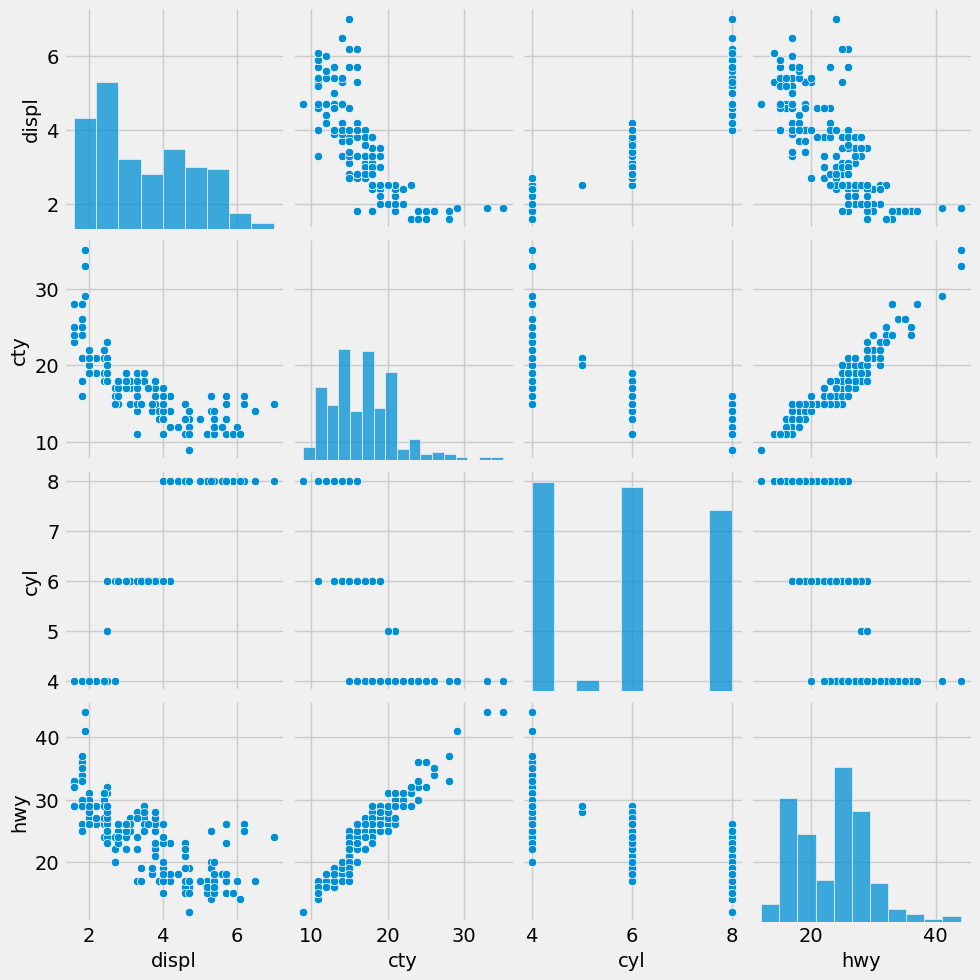

In [70]:
#drop year 

mpgnum2 = mpg[['displ','cty', 'cyl', 'hwy']]

sns.pairplot(mpgnum2, x_vars=mpgnum2, y_vars=mpgnum2)

## Dummify the `drv` Variable

In [148]:
mpg['drv'].unique()

array(['f', '4', 'r'], dtype=object)

In [149]:
mpg['drv'].value_counts()

f    106
4    103
r     25
Name: drv, dtype: int64

In [73]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [74]:
drv_dummy = pd.get_dummies(mpg['drv'], prefix='drv')
mpg = pd.concat([mpg, drv_dummy], axis=1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,drv_4,drv_f,drv_r
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,0,1,0
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,0,1,0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,0,1,0
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,0,1,0
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,0,1,0


In [76]:
#dropping one dummy variable to avoid multicollinearity

mpg.drop(mpg.columns[12], axis=1, inplace=True)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,drv_4
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,0
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,0
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,0
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,0


In [171]:
mpg['drv_4'].value_counts()

0    131
1    103
Name: drv_4, dtype: int64

In [172]:
mpg['drv_r'].value_counts()

0    209
1     25
Name: drv_r, dtype: int64

## Split Your Data Into Factors (`X`) and Target (`y`)
You only need to keep the `displ` and `drv` variable(s) here, as those are the only columns you'll be fitting your model on in the next section.

In [173]:
#setting capacity as dependent variable

feature_cols = ['displ','drv_r', 'drv_4']
X = mpg[feature_cols] 
y = mpg.cty

In [174]:
print((type(X)))
print((type(X.values)))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [175]:
print((type(y)))
print((type(y.values)))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [176]:
print((X.shape))
print((y.shape))

(234, 3)
(234,)


## Instantiate a Linear Regression Model Object Predicting Highway MPG
Instantiate a `LinearRegression` object here.

In [177]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
type(lr)

sklearn.linear_model._base.LinearRegression

In [178]:
#help(lr)
lr

LinearRegression()

In [179]:
lr.fit(X,y)

LinearRegression()

In [180]:
print(lr.intercept_)
print(lr.coef_)

25.954742914067104
[-2.33850571  0.22936265 -2.27516377]


## Evaluate Your Model

- Run five-fold cross-validation on your data.
  - Report the mean of the mean squared error across five folds.
  - Report the mean R-squared value across five folds.

In [192]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

y_null = np.zeros_like(y_test, dtype=float)

y_null.fill(y_test.mean())
y_null

array([16.40677966, 16.40677966, 16.40677966, 16.40677966, 16.40677966,
       16.40677966, 16.40677966, 16.40677966, 16.40677966, 16.40677966,
       16.40677966, 16.40677966, 16.40677966, 16.40677966, 16.40677966,
       16.40677966, 16.40677966, 16.40677966, 16.40677966, 16.40677966,
       16.40677966, 16.40677966, 16.40677966, 16.40677966, 16.40677966,
       16.40677966, 16.40677966, 16.40677966, 16.40677966, 16.40677966,
       16.40677966, 16.40677966, 16.40677966, 16.40677966, 16.40677966,
       16.40677966, 16.40677966, 16.40677966, 16.40677966, 16.40677966,
       16.40677966, 16.40677966, 16.40677966, 16.40677966, 16.40677966,
       16.40677966, 16.40677966, 16.40677966, 16.40677966, 16.40677966,
       16.40677966, 16.40677966, 16.40677966, 16.40677966, 16.40677966,
       16.40677966, 16.40677966, 16.40677966, 16.40677966])

In [191]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, y_null))

3.561177885826764

In [184]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [185]:
mse_scores = -cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(lr, X, y, cv=5, scoring='r2')

In [186]:
# mean of mean squared error across five folds
mean_mse = mse_scores.mean()
print("Mean of Mean Squared Error across five folds:", mean_mse)

Mean of Mean Squared Error (MSE) across five folds: 6.164977672090631


In [187]:
# mean r-squared value across five folds
mean_r2 = r2_scores.mean()
print("Mean R-squared value across five folds:", mean_r2)

Mean R-squared value across five folds: 0.39756555327971965


# Part 2: Classification Using KNN

## Read in the `diamonds` Data
This is data regarding 50,000 round-cut diamonds.

|Factor            |Description                                                                                 |
|------------------|--------------------------------------------------------------------------------------------|
|price             |price in US dollars (326-18,823)                                                            |
|carat             |weight of the diamond (0.2--5.01)                                                           |
|cut               |quality of the cut (Fair, Good, Very Good, Premium, Ideal)                                  |
|color             |diamond colour, from J (worst) to D (best)                                                  |
|clarity           |how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))            |
|x                 |length in mm (0--10.74)                                                                     |
|y                 |width in mm (0--58.9)                                                                       |
|z                 |depth in mm (0--31.8)                                                                       |
|depth             |total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)                          |
|table             |width of top of diamond relative to widest point (43--95)                                   |

In [77]:
dia = pd.read_csv('data/diamonds.csv')
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Explore the Data

In [80]:
dia.shape

(53940, 10)

In [81]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [78]:
dia.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [234]:
dia.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [235]:
dia.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

## Filter Your Data
Filter your data to only contain diamonds with `'Ideal'` and `'Good'` cuts.

In [82]:
dia = dia[dia['cut'].isin(['Ideal','Good'])]
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
10,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46


In [237]:
#dia['cut'] = dia.cut.map({'Good':0, 'Ideal':1})

## Downsample the Majority Class

In [244]:
from sklearn.utils import resample

In [245]:
dia['cut'].value_counts()

Ideal    21551
Good      4906
Name: cut, dtype: int64

In [246]:
downsamp = resample(dia[dia['cut'] == 'Ideal'], replace=False, n_samples=len(dia[dia['cut'] == 'Good']))

balanced_dia = pd.concat([downsamp, dia[dia['cut'] == 'Good']])

print(balanced_dia)

       carat    cut color clarity  depth  table  price     x     y     z
45141   0.46  Ideal     G      IF   62.1   56.0   1654  4.93  4.96  3.07
43864   0.50  Ideal     G     VS2   60.9   58.0   1449  5.10  5.12  3.11
14886   1.28  Ideal     G     SI2   61.4   57.0   5995  6.99  6.96  4.28
35731   0.30  Ideal     D     VS2   62.5   54.0    911  4.32  4.29  2.69
28102   0.31  Ideal     F     SI1   62.3   56.0    663  4.35  4.32  2.70
...      ...    ...   ...     ...    ...    ...    ...   ...   ...   ...
53913   0.80   Good     G     VS2   64.2   58.0   2753  5.84  5.81  3.74
53914   0.84   Good     I     VS1   63.7   59.0   2753  5.94  5.90  3.77
53916   0.74   Good     D     SI1   63.1   59.0   2753  5.71  5.74  3.61
53927   0.79   Good     F     SI1   58.1   59.0   2756  6.06  6.13  3.54
53936   0.72   Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61

[9812 rows x 10 columns]


## Prepare Your `X`, `y` Matrices
Construct an `X` matrix using **all numeric columns** from the `diamonds` data.

You will be predicting `cut`. Construct a `y` vector in a numeric format that can be used by scikit-learn.

In [307]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dia = dia.copy()
dia.loc[:, 'cut'] = label_encoder.fit_transform(dia['cut'])

X = dia.drop(['cut', 'color', 'clarity'], axis=1)
y = dia['cut']

## Scale Your `X` Matrix Using a StandardScaler

In [310]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_scaled = sc.fit_transform(X)

print(X_scaled)

[[-1.13488499 -0.28413913 -0.73858936 ... -1.51204298 -1.48563076
  -1.53044036]
 [-1.13488499 -4.23130803  4.31918389 ... -1.41864305 -1.40213687
  -1.71127364]
 [-0.95329419  1.26040522  0.77874261 ... -1.14778328 -1.1423781
  -1.0482183 ]
 ...
 [-0.02264137 -0.88479527  0.27296529 ...  0.16915564  0.16569284
   0.08198967]
 [-0.02264137  1.08878918 -0.73858936 ...  0.11311568  0.15641574
   0.2477535 ]
 [ 0.04545518  0.31651701 -0.73858936 ...  0.24387558  0.26774092
   0.29296182]]


## Why Did We Just Do That?
In the cell below, provide a 2–3 sentence explanation of why scaling our $X$ matrix was necessary here. What could have gone wrong if we didn't?

Scaling for KNN is important because KNN uses the distance between two points. If two features are on different scales, the distances between them on each coordinate might be given falsely disproportionate weights. If we didn't scale, it's possible that KNN would make all of its decisions based on the feature with the widest scale.

## Split Into Testing and Training Groups

Now that we've downsampled/balanced our classes, as well as removed unused factors, we're ready to split into testing and training groups. We're doing this avoid _leaking information into our testing set_. 

- First, we'll perform cross-validation on our _training_ set, finding an optimal value for $k$. 
- After this, we'll take that value of $k$ and use it to fit our model to the _training_ set, creating our tuned model.
- Finally, we will take this same model and use it to _predict_ and _score_ against our _testing_ set.
- Note that our model at this point will have never seen nor trained against the _testing_ set.

In the future, we can (and should!) automate this process using a [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) — a tool used to abstract our modeling process, allowing data to be processed without manual intervention.

In [262]:
from sklearn.model_selection import train_test_split

# 80% for training 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## K-Nearest Neighbors
You're going to fit a KNN model here, but you first need to tune your model to find the best value of $k$. Loop through values of $k$ you think are appropriate (Hint: Look for "elbows" in your result curves) and select the value that produces the best model with respect to **five-fold cross-validation**.

**Important**: Do not use _any_ code copied and pasted directly from the lecture! Typing things out yourself is 100% essential to the learning process. It's OK to use the exact same strategies as we did in class, but be sure to enter them manually.

In [268]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# values for k to try
param_grid = {'n_neighbors': range(1, 50)}


In [269]:
knn = KNeighborsClassifier()

#cross-validation to find the best k
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_k = grid_search.best_params_['n_neighbors']

print("Best value of k:", best_k)

Best value of k: 10


## Produce the Plot of Tuning Parameter ($k$) vs. Accuracy
What is the "best" value of k?

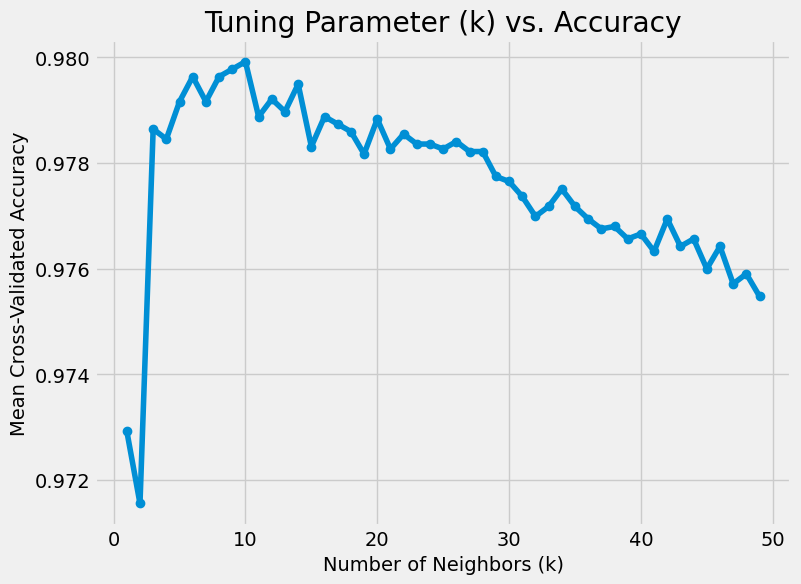

In [311]:
#best value of k is 10

results = grid_search.cv_results_

k_values = results['param_n_neighbors'].data
mean_test_scores = results['mean_test_score']

# plot 
plt.figure(figsize=(8, 6))
plt.plot(k_values, mean_test_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Tuning Parameter (k) vs. Accuracy')
plt.grid(True)
plt.show()

## Produce the Best KNN Model
Now that you know the optimal value of $k$, fit a KNN on the training set (this training set should still filtered to `'Ideal'` and `'Good'` cuts).

In [272]:
best_k = 10  
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

## Does This Model Outperform the Baseline?

In [276]:
knn_accuracy = knn.score(X_test_scaled, y_test)

baseline_accuracy = y_train.value_counts(normalize=True).max()

print("KNN Model Accuracy:", knn_accuracy)
print("Baseline Model Accuracy:", baseline_accuracy)

if knn_accuracy > baseline_accuracy:
    print ("\nThe model outperforms the baseline")
else:
    print ("\nThe model does not outperform the baseline")

KNN Model Accuracy: 0.9794028722600151
Baseline Model Accuracy: 0.8157335223245925

The model outperforms the baseline


## Prediction
Suppose I have a diamond with the following specifications:

In [281]:
new_diamond = pd.DataFrame({
    'carat': 0.24,
    'depth': 60.,
    'table': 64.,
    'price': 400.,
    'x': 3.,
    'y': 3.,
    'z': 3.
}, index=[0])

What do you predict to be the cut of this diamond?

**Big hint:** Don't forget to scale this new data point appropriately!

In [312]:
new_diamond_scaled = scaler.transform(new_diamond)

predicted_cut = knn.predict(new_diamond_scaled)[0]

if predicted_cut == 0:
    print ("Predicted cut: good")
elif predicted_cut ==1:
     print ("Predicted cute: ideal")

Predicted cut: good


# Part 3: Now _YOU_ Model!
Put your skills to the test.

Using the _full_ `diamonds` data set, produce a **logistic regression** model that achieves the best five-fold cross-validation. Note that, for this problem, you're performing multi-class classification. The response variable has _five_ categories.

In [287]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

In [288]:
X = dia.drop('cut', axis=1)
y = dia['cut']

In [293]:
categorical_columns = ['color', 'clarity']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['float64']).columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)


In [294]:
logistic_regression = LogisticRegression(max_iter=1000)
lr = logistic_regression 

In [295]:
# combine preprocessor and logistic regression model into pipeline

from sklearn.pipeline import Pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('lr', lr)])

In [296]:
mean_accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()

print("Mean Accuracy with Five-Fold Cross-Validation:", mean_accuracy)

Mean Accuracy with Five-Fold Cross-Validation: 0.8955656455656456
